## 1. Get and load the data

Data loaded from: [IRIS CSV](https://osdn.net/projects/sfnet_irisdss/downloads/IRIS.csv/)


## 2. Write a note about the data set

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]
The informational collection comprises of 50 tests from each of three types of (Iris setosa, Iris virginica and Iris versicolor). Four highlights were measured from each example: the length and the width of the sepals and petals, in centimeters. In view of the blend of these four highlights, Fisher built up a linear discriminant model to recognize the species from each other.[4]

[1] [R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188. doi:10.1111/j.1469-1809.1936.tb02137.x.](http://eecs.oregonstate.edu/research/multiclust/Evaluation-4.pdf)

[2] [Jump up ^ Edgar Anderson (1936). "The species problem in Iris". Annals of the Missouri Botanical Garden. 23 (3): 457–509. JSTOR 2394164.](http://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x/abstract;jsessionid=038927D2629DEFFA6032B5BF5151B94A.f03t03)

[3] Jump up ^ Edgar Anderson (1935). "The irises of the Gaspé Peninsula". Bulletin of the American Iris Society. 59: 2–5.

[4] [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

## 3. Create a simple plot

In [1]:
import numpy as np
# Adapted from https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html
filename = 'IRIS.csv'
sLen, sWid, pLen, pWid = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(0,1,2,3), unpack=True, dtype=float)
spec = np.genfromtxt('IRIS.csv', delimiter=',', usecols=(4), unpack=True, dtype=str)        
for i in range(10):
    print('{0:.1f} {1:.1f} {2:.1f} {3:.1f} {4:s}'.format(sLen[i], sWid[i], pLen[i], pWid[i], spec[i]))

5.1 3.5 1.4 0.2 Iris-setosa
4.9 3.0 1.4 0.2 Iris-setosa
4.7 3.2 1.3 0.2 Iris-setosa
4.6 3.1 1.5 0.2 Iris-setosa
5.0 3.6 1.4 0.2 Iris-setosa
5.4 3.9 1.7 0.4 Iris-setosa
4.6 3.4 1.4 0.3 Iris-setosa
5.0 3.4 1.5 0.2 Iris-setosa
4.4 2.9 1.4 0.2 Iris-setosa
4.9 3.1 1.5 0.1 Iris-setosa


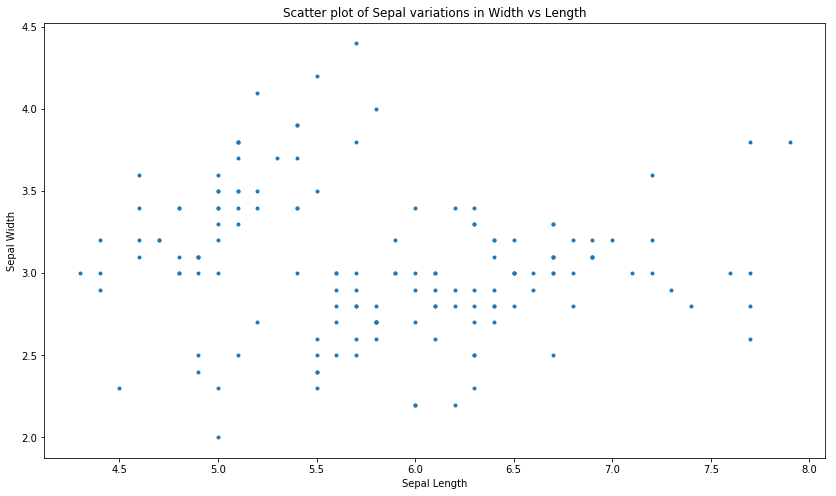

In [2]:
# Adapted from gradient descent notebook: https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/gradient-descent.ipynb

import matplotlib.pyplot as pl

pl.rcParams['figure.figsize'] = (14.0, 8.0)
pl.scatter(sLen, sWid, marker='.')

pl.title('Scatter plot of Sepal variations in Width vs Length')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.show()

## 4. Create a more complex plot

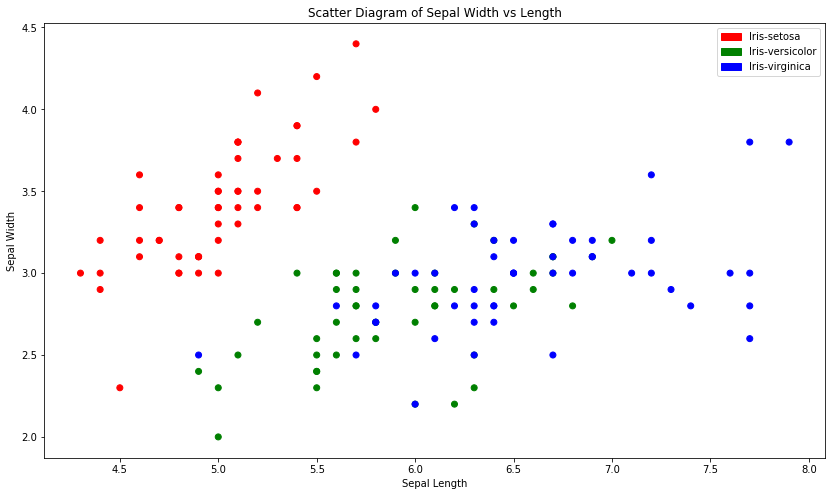

In [7]:
import matplotlib.patches as mpatches
pl.rcParams['figure.figsize'] = (14.0, 8.0)

# Gen a np of species from the dataset 
species = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), unpack=True, dtype=str)

# Creating a dict of colours each associated to a flower type.
colours = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}
#List comprehension to scatter items in different colours
pl.scatter(sLen, sWid, c=[colours[i] for i in species], label=[colours[i] for i in colours])

pl.title('Scatter Diagram of Sepal Width vs Length')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')

#Adapated from https://stackoverflow.com/questions/674519/how-can-i-convert-a-python-dictionary-to-a-list-of-tuples
    
handles = [mpatches.Patch(color=colour, label=label) for label, colour in colours.items()]

pl.legend(handles=handles)
pl.show()


## 5. Use seaborn

Use the [seaborn](http://seaborn.pydata.org/examples/scatterplot_matrix.html) library to create a scatterplot matrix of all five variables.

To install seaborn use:
```
pip install seaborn
```


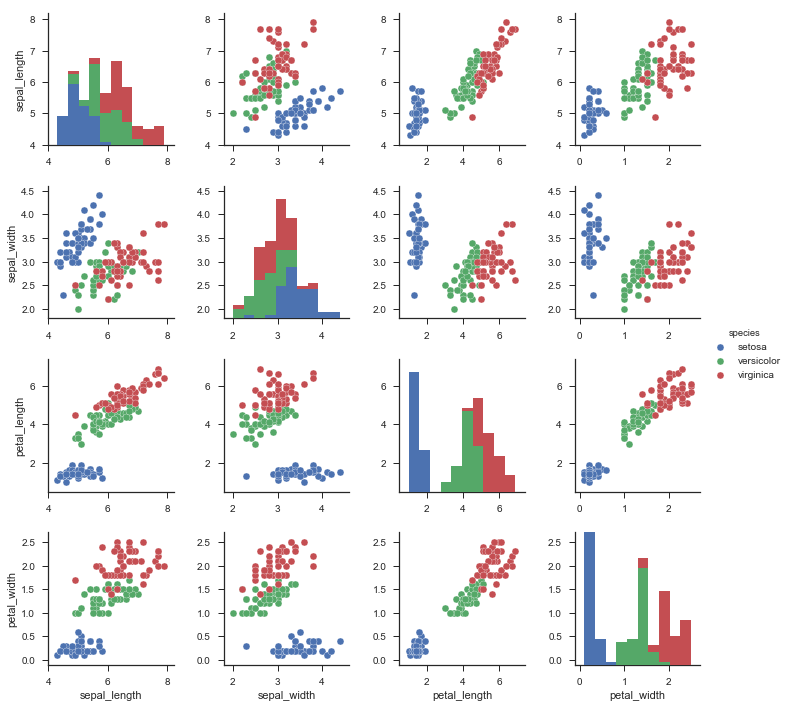

In [10]:
import seaborn as sns
sns.set(style="ticks")

#Load the dataset from the online iris dataset on seaborns github
df = sns.load_dataset("iris")

#Create some plots using the sns data 
sns.pairplot(df, hue="species")
#Show our new plots
pl.show()

## 6. Fit a line

Fit a straight line to the variables petal length and petal width for the whole data set.
Plot the data points in a scatter plot with the best fit line shown.

Best fit is m = 0.416419 and c = -0.366514


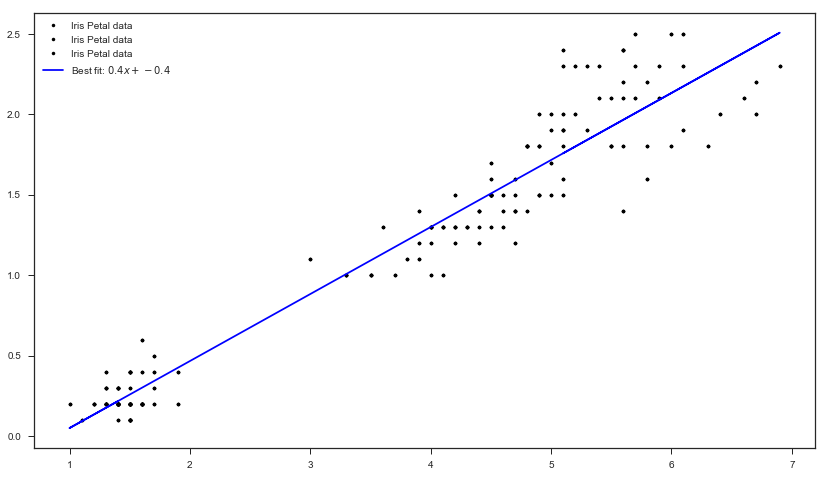

In [16]:
m, c = np.polyfit(pLen, pWid, 1)
print("Best fit is m = %f and c = %f" % (m, c))

# Plot the best fit line.
pl.plot(pLen, pWid, 'k.', label='Iris Petal data')
pl.plot(pLen, m * pLen + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.legend()
pl.show()